In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)

# Data Exploration

In [8]:
data = pd.read_csv("../datasets/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.shape

(1460, 81)

Посмотрим распределение целевой переменной:

In [10]:
data['SalePrice'].mean(), data['SalePrice'].std()

(180921.19589041095, 79442.50288288662)

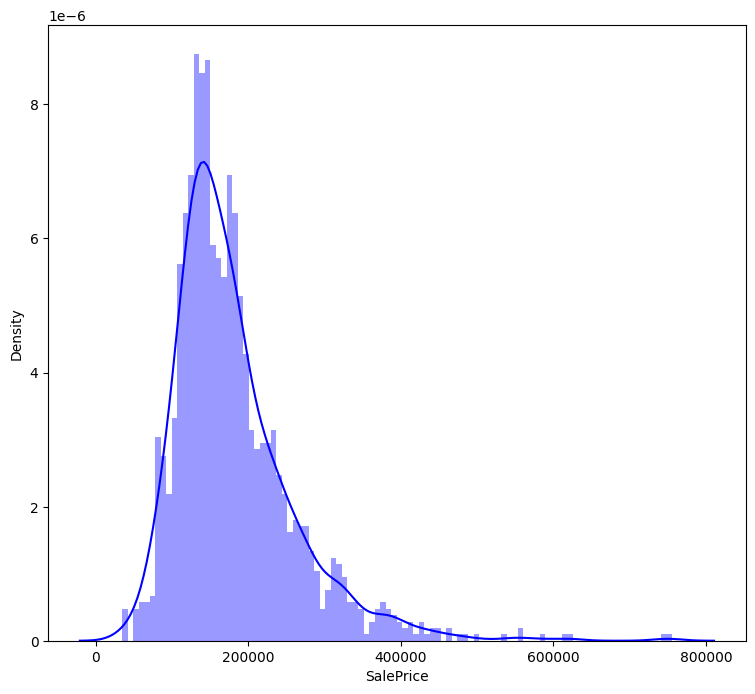

In [11]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

Посмотрим также распределения числовых переменных:

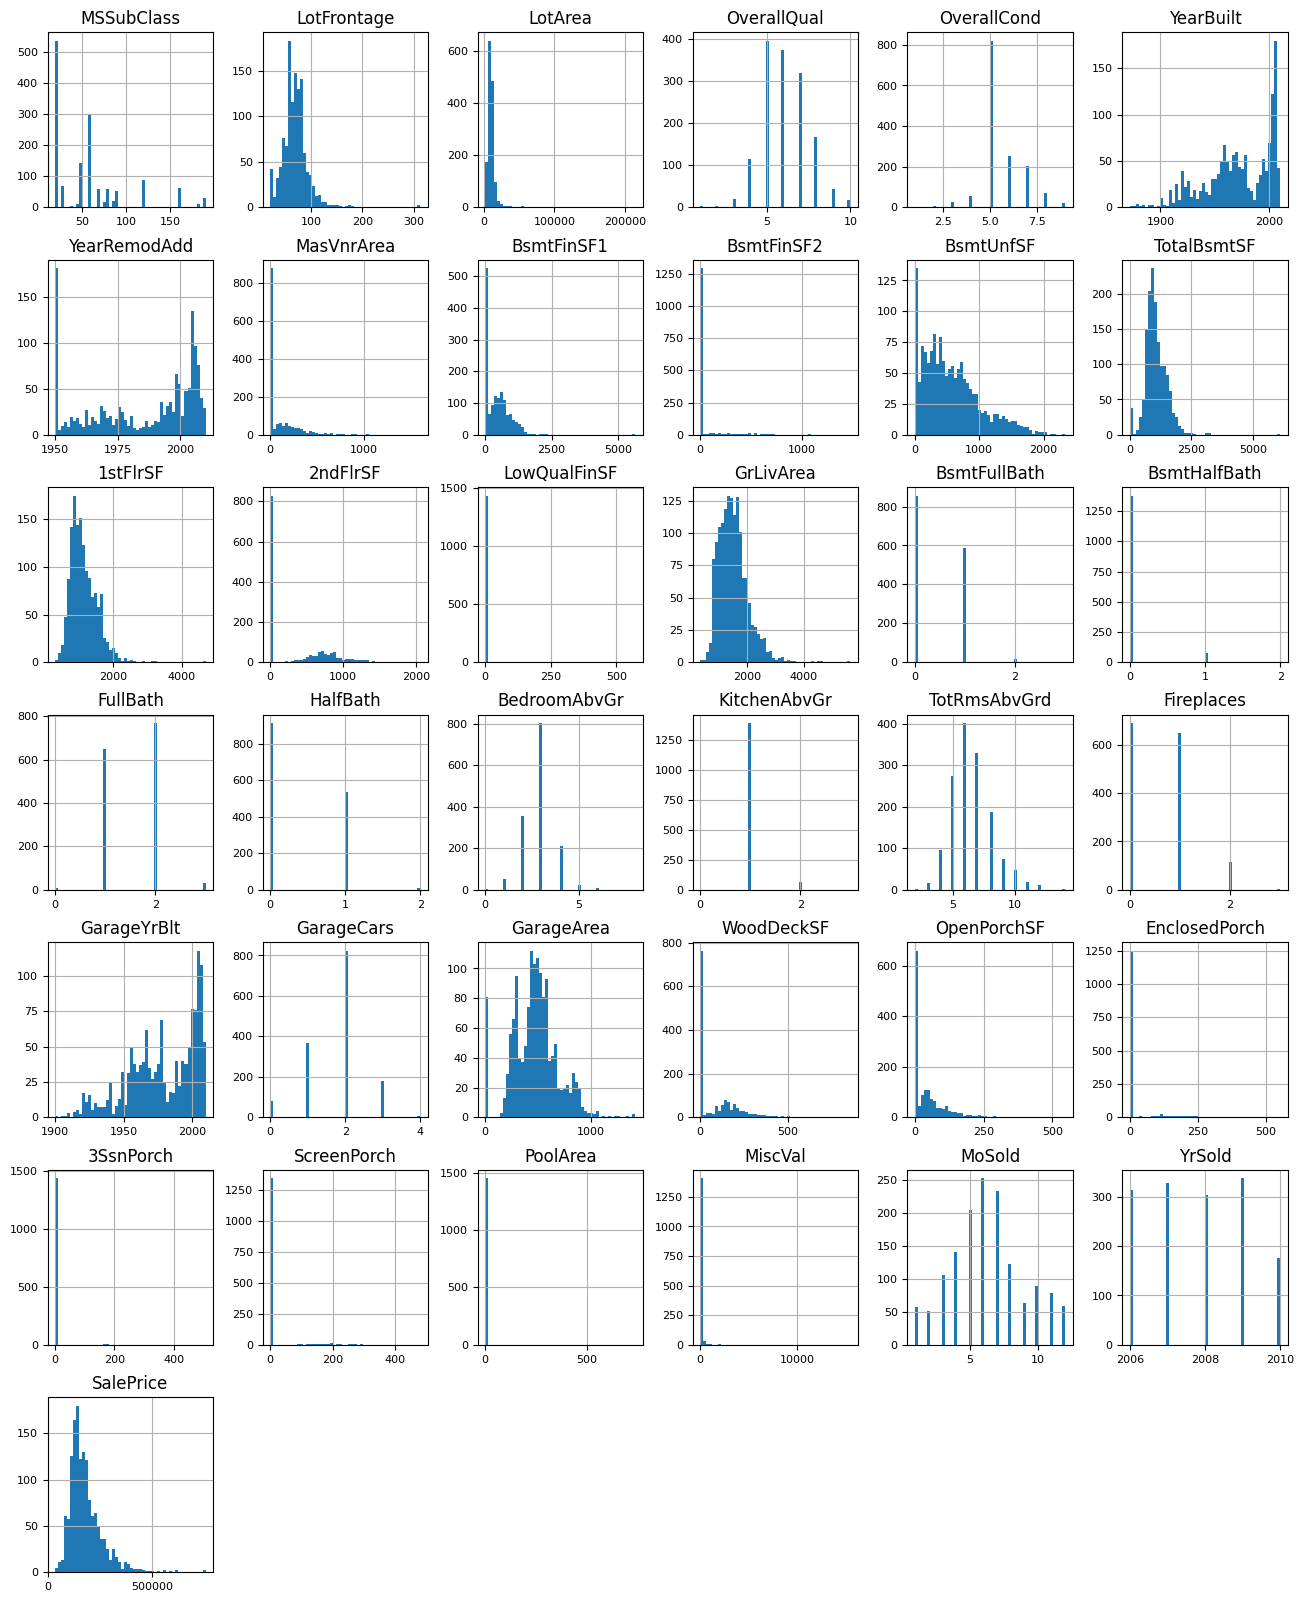

In [55]:
num_data = data.select_dtypes(include = ['float64', 'int64']).drop('Id', axis=1)
num_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# Feature Selection

Оценим корреляцию между признаками:

<Axes: >

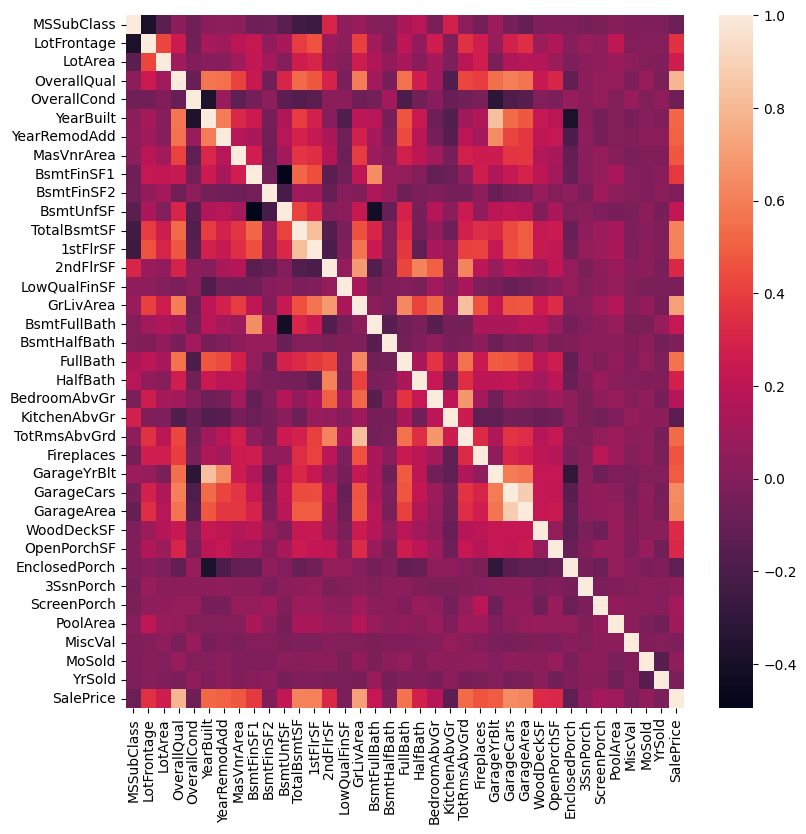

In [82]:
cormatrix = num_data.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(cormatrix)

Выделим признаки, имеющие положительную корреляцию с целевой переменной:

In [83]:
good_features = list(cormatrix[cormatrix['SalePrice'] > 0.1]['SalePrice'].keys())
print(good_features)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice']


Есть признаки, имеющие высокую корреляцию с другими признаками. Отбросим их:

In [84]:
dataset = data[good_features]
selected_corr = dataset.corr()
upper_triangle = selected_corr.where(np.triu(np.ones(selected_corr.shape),k=1).astype(bool)) 
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
if len(to_drop) > 0:
  dataset = dataset.drop(to_drop, axis=1)
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


Выделим лучшие числовые признаки:

In [131]:
selected_numeric_features = dataset.columns.to_list()
print(selected_numeric_features)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice']


Посмотрим на пропуски в данных. Из описания данных известно, что пропуски обозначают отсутствие той или иной характеристики у объекта недвижимости. Поэтому в дальнейшем заполним их либо 0 (для float64), либо "nonexist" (для категориальных)

In [15]:
na_cols = data.columns[data.isna().any()].to_list()
counts = data[na_cols].isna().sum()
percent = np.round(data[na_cols].isna().sum() / len(data) * 100, 2)
na_info_df = pd.DataFrame()
na_info_df['counts'] = counts
na_info_df['percent'] = percent
dtypes = data[na_cols].dtypes
na_info_df['dtype'] = dtypes
na_info_df

,counts,percent,dtype
LotFrontage,259,17.74,float64
Alley,1369,93.77,object
MasVnrType,8,0.55,object
MasVnrArea,8,0.55,float64
BsmtQual,37,2.53,object
BsmtCond,37,2.53,object
BsmtExposure,38,2.60,object
BsmtFinType1,37,2.53,object
BsmtFinType2,38,2.60,object
Electrical,1,0.07,object


Загрузим тестовую выборку

In [ ]:
test_data = pd.read_csv("../datasets/test.csv")
test_data.head()

Выберем лучшие категориальные признаки:

In [136]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2

cat_data = data.select_dtypes(exclude = ['float64', 'int64']).fillna("nonexist")
test_data_cat = test_data.select_dtypes(exclude = ['float64', 'int64']).fillna("nonexist")

oe = OrdinalEncoder()
encoded_cat = pd.DataFrame(oe.fit_transform(cat_data), columns=cat_data.columns)

fs = SelectKBest(chi2)
fs.fit(encoded_cat, data['SalePrice'].to_list())
best_k_cat_features = fs.get_feature_names_out()
print(best_k_cat_features)
cat_data = cat_data[best_k_cat_features]
test_data_cat = test_data_cat[best_k_cat_features]


['LotShape' 'LandSlope' 'Neighborhood' 'BldgType' 'HouseStyle'
 'Exterior1st' 'Exterior2nd' 'BsmtFinType1' 'HeatingQC' 'GarageType']


Сохраним тренировочную выборку с отобранными признаками:

In [157]:
num_data = dataset.fillna(0)
selected_train = pd.concat([cat_data, num_data], axis=1)
selected_train.to_csv("../datasets/selected_train.csv", index=False)
selected_train.head()

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,Reg,Gtl,CollgCr,1Fam,2Story,VinylSd,VinylSd,GLQ,Ex,Attchd,...,1,2,1,3,0,2,0,61,0,208500
1,Reg,Gtl,Veenker,1Fam,1Story,MetalSd,MetalSd,ALQ,Ex,Attchd,...,0,2,0,3,1,2,298,0,0,181500
2,IR1,Gtl,CollgCr,1Fam,2Story,VinylSd,VinylSd,GLQ,Ex,Attchd,...,1,2,1,3,1,2,0,42,0,223500
3,IR1,Gtl,Crawfor,1Fam,2Story,Wd Sdng,Wd Shng,ALQ,Gd,Detchd,...,1,1,0,3,1,3,0,35,0,140000
4,IR1,Gtl,NoRidge,1Fam,2Story,VinylSd,VinylSd,GLQ,Ex,Attchd,...,1,2,1,4,1,3,192,84,0,250000


In [148]:
selected_numeric_features[-1]

'SalePrice'

Сохраним также тестовую выборку с отобранными признаками:

In [158]:
test_data_num = test_data.select_dtypes(include = ['float64', 'int64']).fillna(0)[selected_numeric_features[:-1]]
selected_test = pd.concat([test_data_cat, test_data_num], axis=1)
selected_test.to_csv("../datasets/selected_test.csv", index=False)
selected_test.head()

,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,HeatingQC,GarageType,...,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch
0,Reg,Gtl,NAmes,1Fam,1Story,VinylSd,VinylSd,Rec,TA,Attchd,...,896,0.0,1,0,2,0,1.0,140,0,120
1,IR1,Gtl,NAmes,1Fam,1Story,Wd Sdng,Wd Sdng,ALQ,TA,Attchd,...,1329,0.0,1,1,3,0,1.0,393,36,0
2,IR1,Gtl,Gilbert,1Fam,2Story,VinylSd,VinylSd,GLQ,Gd,Attchd,...,1629,0.0,2,1,3,1,2.0,212,34,0
3,IR1,Gtl,Gilbert,1Fam,2Story,VinylSd,VinylSd,GLQ,Ex,Attchd,...,1604,0.0,2,1,3,1,2.0,360,36,0
4,IR1,Gtl,StoneBr,TwnhsE,1Story,HdBoard,HdBoard,ALQ,Ex,Attchd,...,1280,0.0,2,0,2,0,2.0,0,82,144


In [153]:
np.all(selected_train.drop("SalePrice", axis=1).columns == selected_test.columns)

True